# Understanding the dataset

**Cement (component 1)** (kg in a m^3 mixture): The amount of cement, measured in kilograms, present in one cubic meter of the concrete mixture. Cement is a binding material responsible for providing strength and durability to concrete.

**Blast Furnace Slag (component 2) (kg in a m^3 mixture)**: The quantity of blast furnace slag, measured in kilograms, included in one cubic meter of the concrete mixture. Blast furnace slag is a byproduct of the iron and steel industry and is commonly used as a supplementary cementitious material in concrete production.

Fly Ash (component 3) (kg in a m^3 mixture): The amount of fly ash, measured in kilograms, added to one cubic meter of the concrete mixture. Fly ash is a waste product from coal combustion and is often used as a partial replacement for cement in concrete to enhance its properties.

Water (component 4) (kg in a m^3 mixture): The volume of water, measured in kilograms, incorporated in one cubic meter of the concrete mixture. Water is required for the hydration process of cement and is crucial for the hardening of concrete.

Superplasticizer (component 5) (kg in a m^3 mixture): The quantity of superplasticizer, measured in kilograms, utilized in one cubic meter of the concrete mixture. Superplasticizers are chemical admixtures that are added to concrete to enhance its workability and flow without compromising its strength.

Coarse Aggregate (component 6) (kg in a m^3 mixture): The weight of coarse aggregate, measured in kilograms, present in one cubic meter of the concrete mixture. Coarse aggregate consists of larger particles such as crushed stone, gravel, or recycled concrete, and provides strength and stability to the concrete.

Fine Aggregate (component 7) (kg in a m^3 mixture): The amount of fine aggregate, measured in kilograms, included in one cubic meter of the concrete mixture. Fine aggregate typically consists of sand and is responsible for filling the gaps between coarse aggregates, contributing to the overall strength and workability of concrete.

Age (day): The age of the concrete specimen, measured in days, at which the compressive strength is determined. Concrete gains strength over time as the hydration process progresses, so the age of the concrete is an important factor in assessing its compressive strength.

Concrete compressive strength (MPa, megapascals): The compressive strength of the concrete specimen, measured in megapascals (MPa). Compressive strength is a fundamental property of concrete that indicates its ability to withstand loads or pressure without breaking.

[Dataset link] : https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-f43e32b42257>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Data/concrete_data.csv')

In [3]:
# First look
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
dataset.describe(include='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# duplicate
len(dataset[dataset.duplicated()])

25

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [9]:
dataset.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

### Exploratory Data Analysis

<Axes: xlabel='Strength', ylabel='Density'>

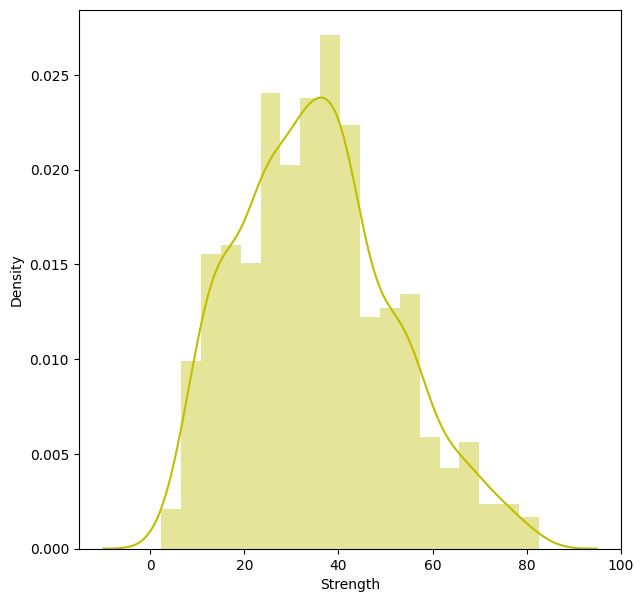

In [10]:
# Dependent variable 'Strength'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Strength'],color="y")

In [11]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

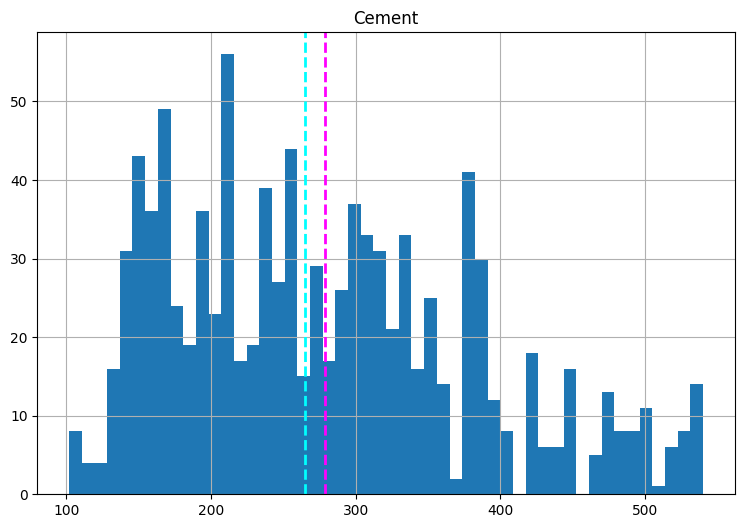

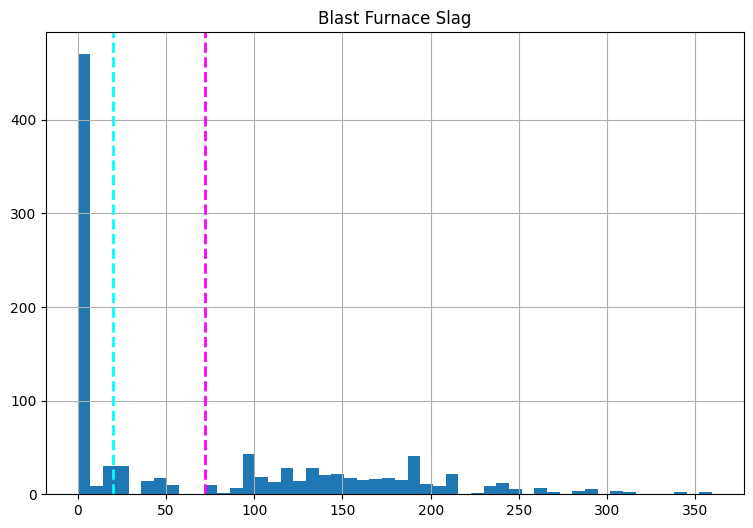

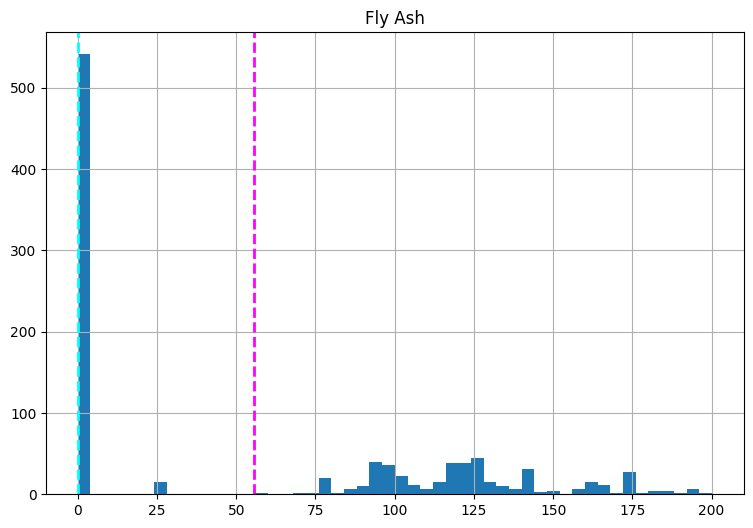

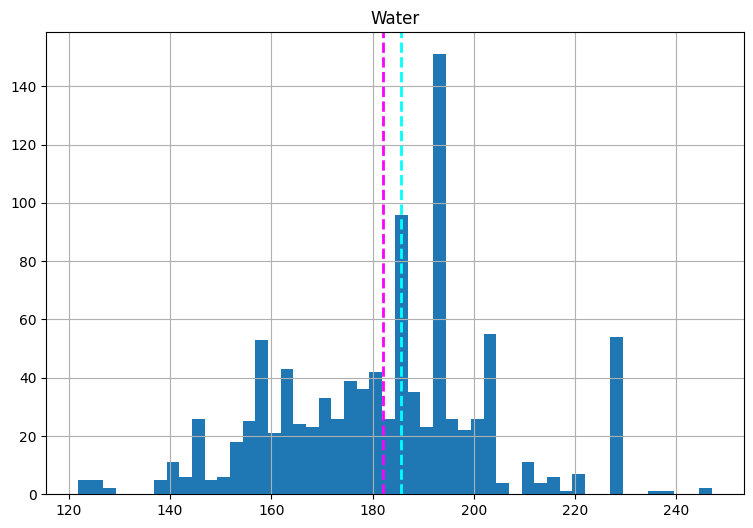

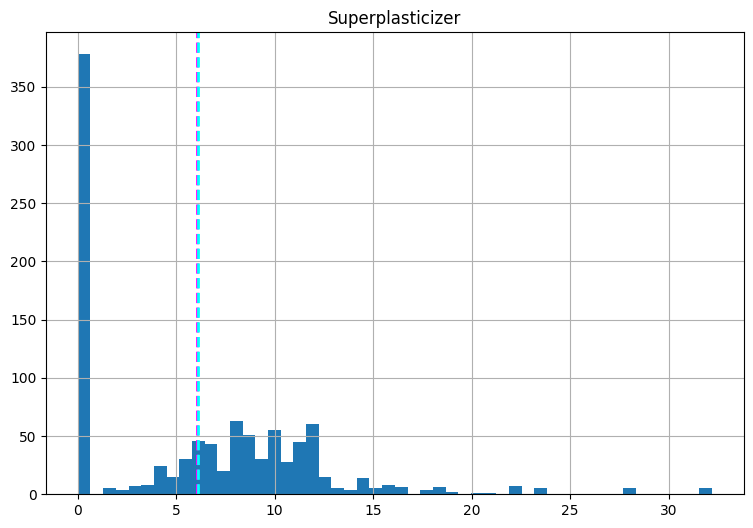

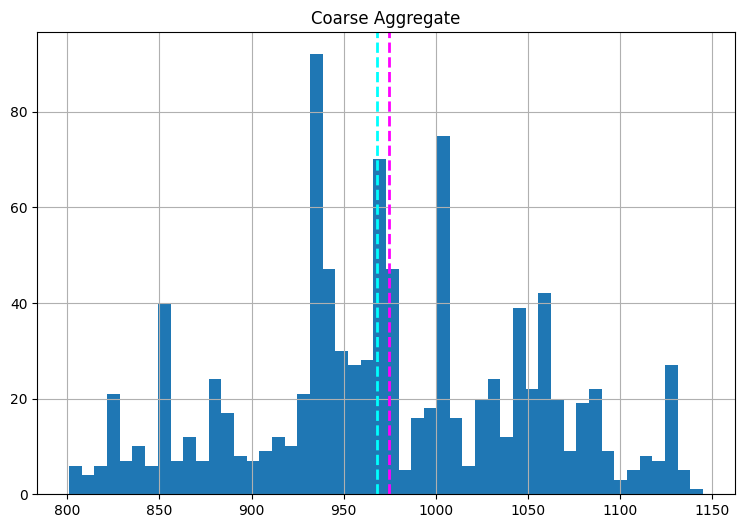

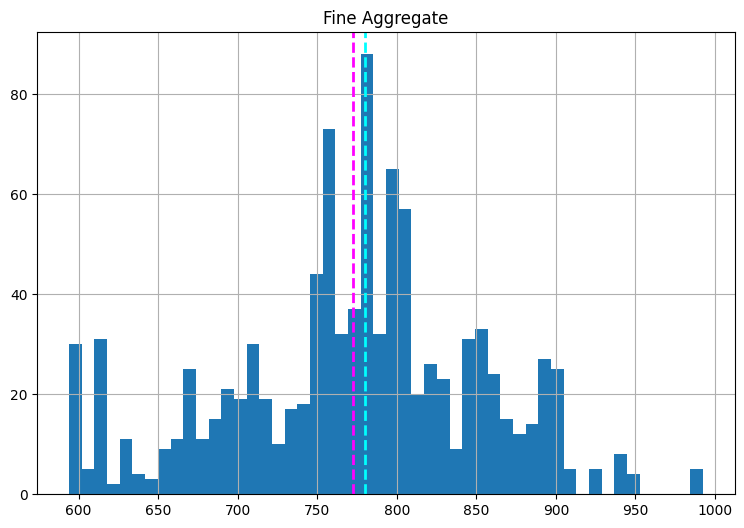

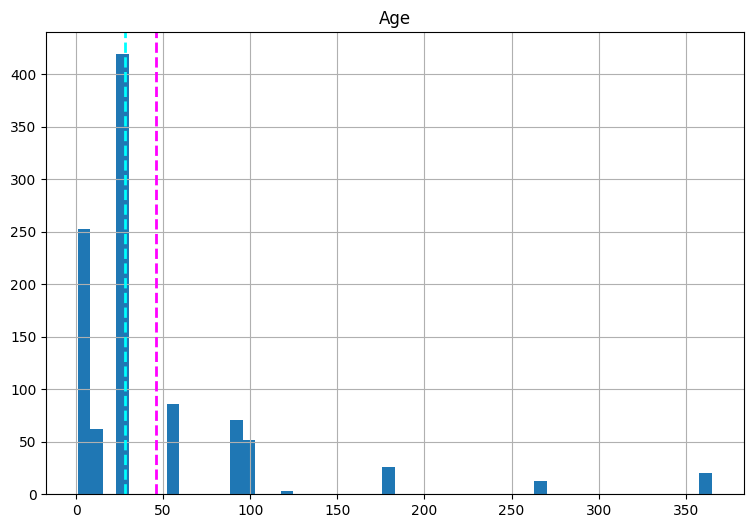

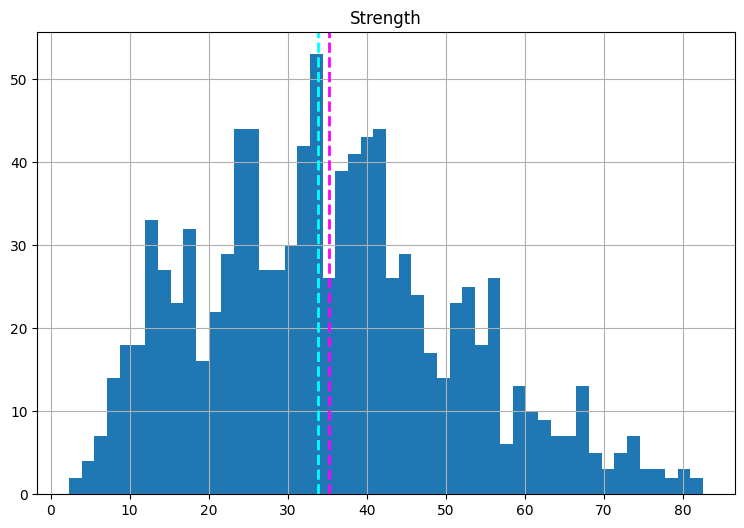

In [12]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

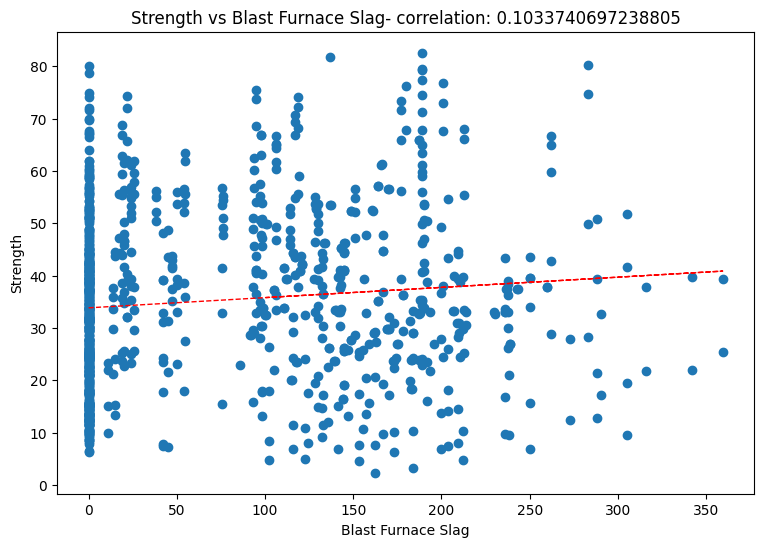

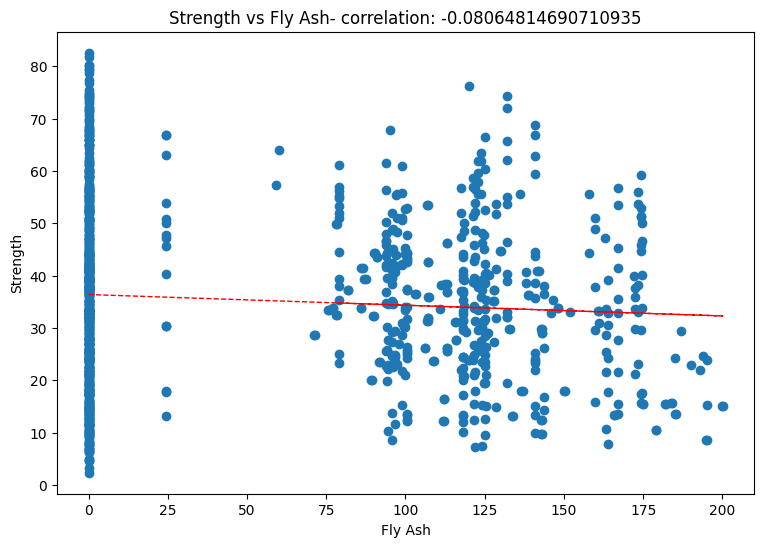

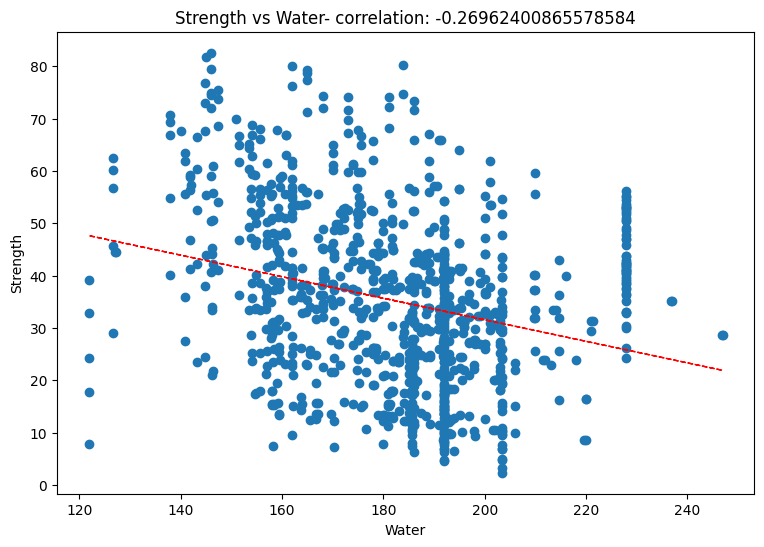

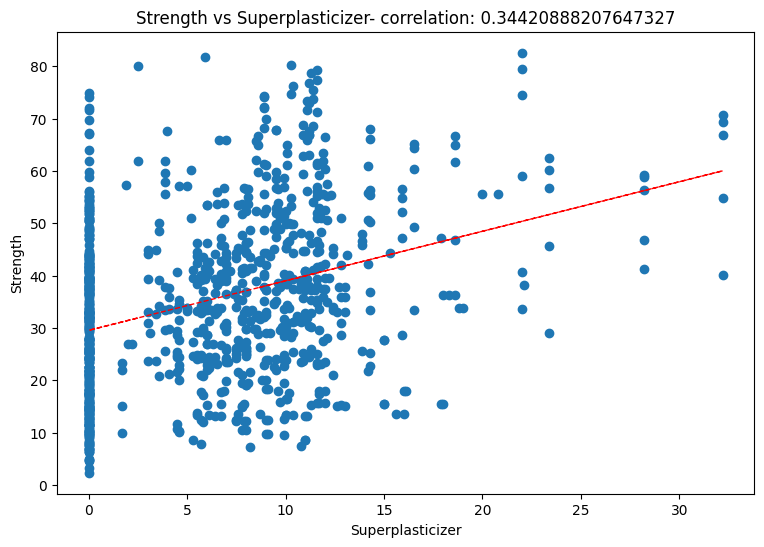

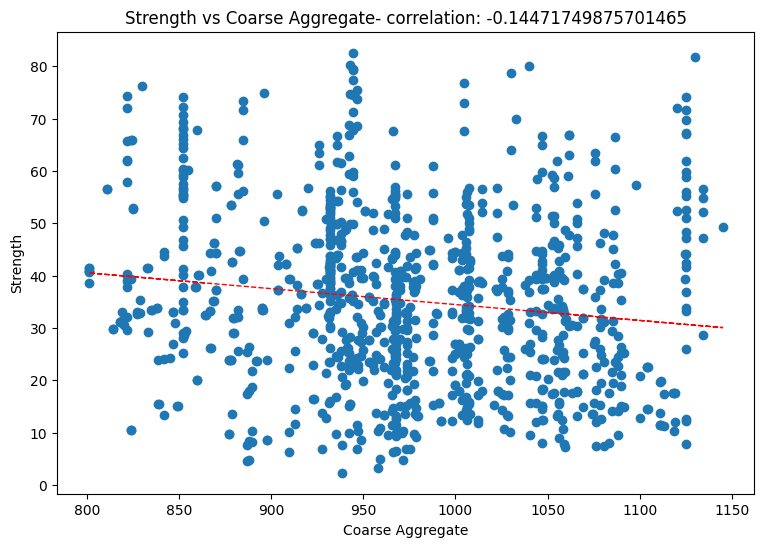

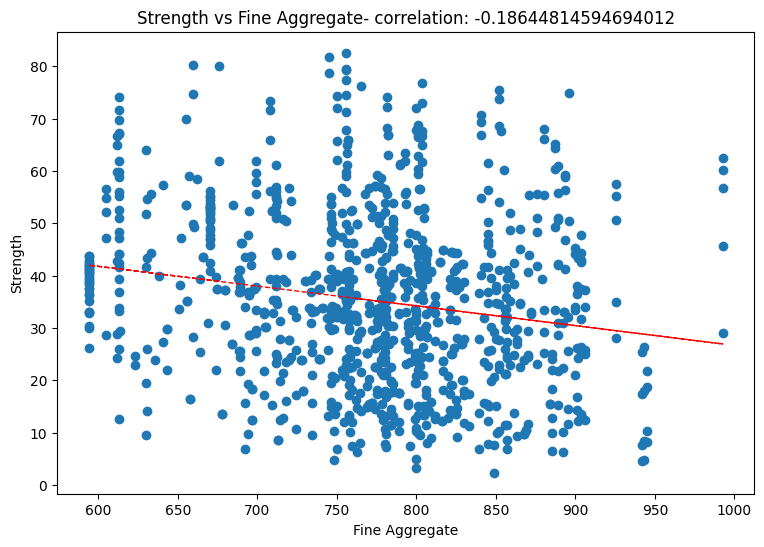

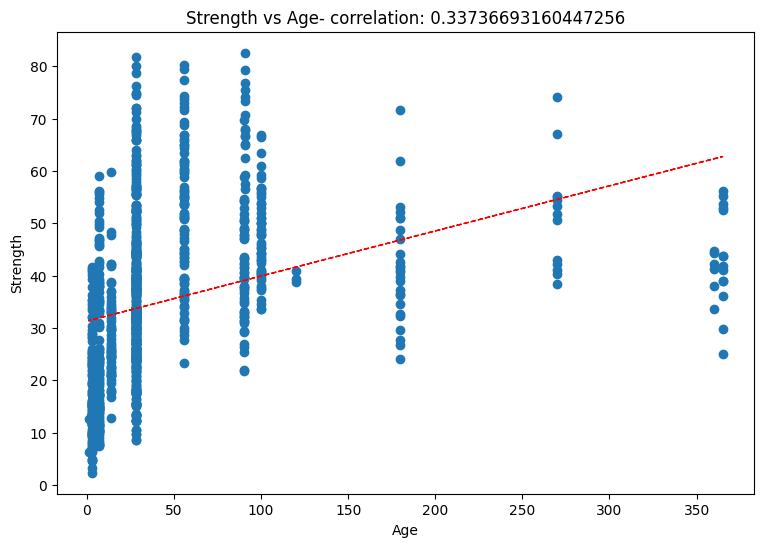

In [13]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Strength']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Strength')
    ax.set_title('Strength vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Strength'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

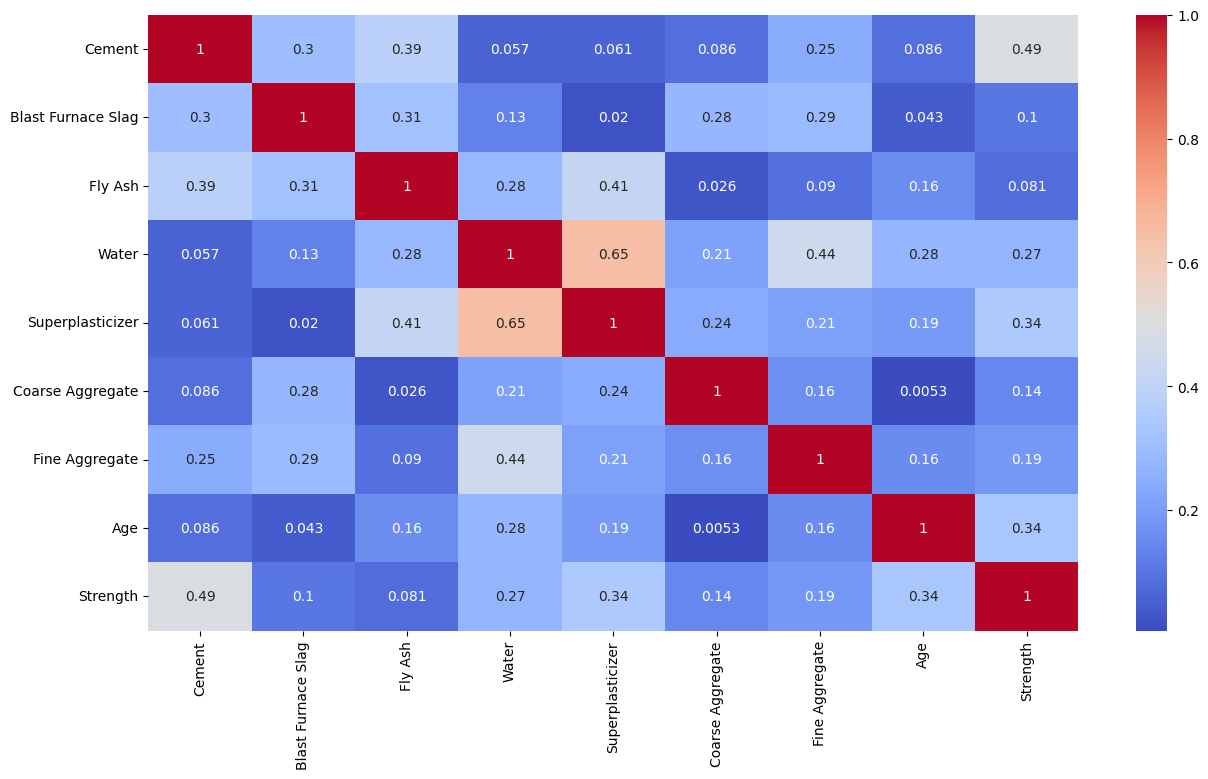

In [14]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [15]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [16]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Strength']]])

,variables,VIF
0,Cement,15.143662
1,Blast Furnace Slag,3.260685
2,Fly Ash,4.170393
3,Water,81.401338
4,Superplasticizer,5.170736
5,Coarse Aggregate,84.735483
6,Fine Aggregate,72.490935
7,Age,1.696257


In [17]:
# Create the dependent variable data
y = dataset['Strength'].values

dataset.drop(columns='Strength',axis=1,inplace=True)

# Create the data of independent variables
X = dataset.values



# Train and Test Split

In [18]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train[0]

array([387. ,  20. ,  94. , 157. ,  13.9, 938. , 845. ,   3. ])

In [20]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train[0]

array([0.65068493, 0.0556483 , 0.47      , 0.28115016, 0.43167702,
       0.39825581, 0.62970396, 0.00549451])

# ML Models


## Linear Regression

In [22]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
regressor.intercept_

-3.57698368156494

In [24]:
regressor.coef_

array([ 52.50181481,  37.6121569 ,  19.01241832, -20.26181361,
         6.70475975,   7.42791361,  10.16736288,  40.8823821 ])

In [25]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([48.39699092, 30.44940872, 41.29713885, 38.95465036, 26.96954039,
       32.02180803, 24.26843653, 18.25937721, 24.03111376, 67.21846152,
       33.31267547, 34.60307892, 29.28029813, 27.92883318, 24.37639171,
       68.73107919, 60.21831747, 26.74420058, 34.38813485, 29.41370891,
       25.46191038, 27.53874624, 28.01678676, 26.10714335, 45.87104967,
       34.57045288, 20.61797617, 35.32576873, 54.34964545, 45.69062035,
       42.31728888, 31.27520836, 53.2152674 , 20.43519931, 50.77367444,
       29.68649032, 32.1783258 , 16.38918648, 24.62679136, 26.33354135,
       21.90813166, 36.03422848, 34.76871484, 26.7594481 , 37.21402415,
       24.38239429, 54.8196415 , 23.34177525, 34.06218903, 31.25335929,
       31.03339445, 52.20477626, 42.8616564 , 51.93323832, 21.50816953,
       19.36626392, 48.92953681, 34.29526972, 36.77114837, 23.99336548,
       49.57963908, 30.16064178, 58.15743079, 45.58339401, 46.76466188,
       19.5853529 , 28.63572592, 18.69064566, 35.54027972, 28.52

In [26]:
y_train

array([25.51, 29.75, 52.44, 57.21, 13.46, 33.69, 21.86, 14.6 , 15.52,
       66.9 , 43.7 , 37.72, 24.  , 26.97, 25.62, 82.6 , 79.3 , 50.46,
       46.39, 24.07, 19.35, 29.98, 21.5 , 26.2 , 45.37, 44.61, 25.57,
       40.56, 47.97, 25.42, 60.32, 42.64, 57.03,  9.87, 25.2 , 43.25,
       38.56, 13.71, 20.92,  9.01, 33.  ,  7.75, 36.8 , 31.88, 35.87,
       24.28, 40.27, 19.01, 41.16, 36.97, 35.17, 39.3 , 56.81, 37.8 ,
       19.99, 13.66, 36.84, 38.63, 42.23, 15.53, 59.76, 39.58, 71.7 ,
       65.91, 55.94, 14.2 , 32.92, 15.07, 44.64, 32.77, 32.96, 39.78,
       24.89, 43.57, 34.49, 24.1 , 27.74, 30.57, 25.72, 54.6 , 30.45,
       31.25, 26.23, 18.13, 36.25,  8.  , 53.58, 76.8 , 30.23,  4.78,
       13.18, 15.42, 36.35, 17.44, 22.84, 33.04, 55.45, 24.85, 38.07,
       22.9 , 40.86, 37.92, 17.24, 49.99, 36.64, 37.44, 25.97, 60.95,
       26.86, 13.29, 13.46, 33.49, 41.84, 22.93, 47.22, 53.72, 22.95,
       28.8 , 32.82, 40.57, 19.42, 20.28, 55.5 , 44.14, 40.2 , 26.26,
       64.02, 35.57,

In [27]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [28]:
#Predicted

y_pred

array([35.65562299, 34.11114609, 37.97380427, 54.51307209, 22.63617169,
       39.52127816, 36.85248187, 28.77792103, 37.60009094, 26.06268335,
       24.93654603, 26.00349529, 36.89703854, 38.70545698, 33.19606472,
       20.90680743, 24.78920491, 25.89973351, 19.20256606, 47.40485862,
       56.47431192, 50.01065713, 35.0323821 , 36.2678387 , 31.01747896,
       24.01697148, 26.72637692, 52.6540332 , 41.46571157, 53.54827561,
       59.05955561, 17.20809028, 17.82572224, 50.40741149, 56.36006602,
       32.34274651, 33.3200522 , 53.23140476, 31.28327155, 29.58918608,
       27.54246443, 32.95804325, 28.45271014, 28.42128232, 26.53616136,
       47.18366924, 43.44845703, 64.80008091, 34.70954572, 54.76867412,
       37.92199697, 32.02114974, 28.88090393, 34.19376839, 16.23327537,
       49.60855756, 31.24828707, 28.44043116, 48.67810578, 44.36857006,
       32.5155197 , 43.81724103, 51.27097775, 38.84208439, 39.87156885,
       23.48409863, 36.96752896, 31.17254161, 28.10856067, 30.86

In [29]:
#actual
y_test

array([40.66, 23.52, 42.03, 57.23, 17.6 , 44.28, 52.12, 26.31, 42.22,
       18.13, 31.97, 26.92, 33.31, 47.74, 33.72, 14.64, 31.02, 15.04,
       47.81, 28.1 , 52.91, 62.05, 23.8 , 38.77, 29.87, 31.42, 35.08,
       56.1 , 32.72, 61.89, 51.04, 17.54, 22.35, 35.36, 61.07, 32.96,
       39.09, 55.65, 26.23, 31.27, 13.54, 31.18, 15.69, 32.72, 29.93,
       46.23, 52.82, 79.4 , 36.99, 61.86, 47.71, 15.36, 27.77, 37.96,
        8.54, 41.37, 31.12,  7.4 , 35.75, 56.74, 12.37, 61.24, 59.89,
       24.24, 33.76, 25.48, 45.37, 17.24, 29.65, 31.35, 16.88, 51.06,
       12.84, 33.73, 15.82, 21.75, 15.57, 34.77, 12.25, 32.1 , 21.6 ,
       56.14, 56.61, 32.72, 15.09, 27.92, 25.37, 11.17, 56.83, 23.52,
       24.4 , 13.4 , 38.46, 48.97, 11.39, 65.7 , 26.85, 59.8 , 23.25,
       37.36, 37.33, 26.06, 55.06, 15.57, 47.4 , 32.88, 17.96, 67.31,
       21.65, 49.97, 33.4 ,  2.33,  9.99, 59.49, 13.12, 21.29, 27.92,
       20.73, 16.5 , 12.18, 37.42, 28.63, 66.  , 43.89, 54.38, 39.06,
        6.9 , 51.04,

In [30]:
mean_squared_error(y_test, y_pred)

97.60942803865707

In [31]:
# Train performance
import math
math.sqrt(mean_squared_error(y_train, y_pred_train))

10.36213578770668

In [32]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9.879748379319034

In [33]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.5953734170508653

In [34]:
r2_score(y_test, y_pred)

0.6278567435976459

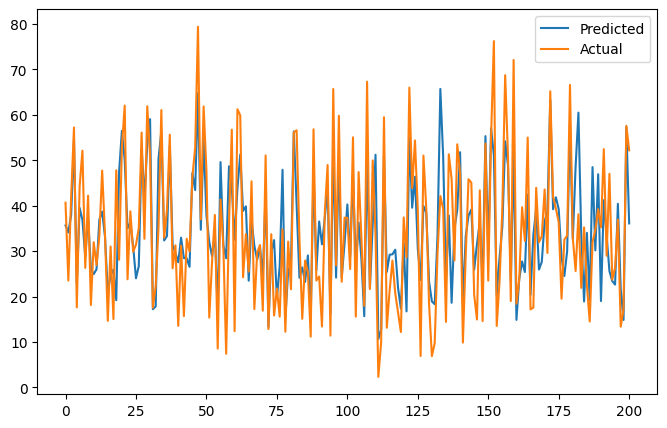

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [36]:
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

## using random forest regressor

In [37]:
# X_train, X_test, y_train, y_test

#using random forest regressor
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=40, n_jobs=-1)

In [38]:
# Predicting on test data using our trained random forest model

# the models regr1 is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = regr1.predict(X_test)
rndf_test_predictions = [round(value) for value in y_test]
y_pred = regr1.predict(X_train)
rndf_train_predictions = [round(value) for value in y_test]

In [39]:
df_final_train = X_train
df_final_test = X_test

Estimators =  10 Train Score 97.13543750834795 test Score 107.27720559460684
Estimators =  50 Train Score 90.97541364938748 test Score 98.05459346783755
Estimators =  100 Train Score 90.03476802871275 test Score 96.89809920918466
Estimators =  250 Train Score 89.21447449398845 test Score 95.15332485399281
Estimators =  450 Train Score 88.36913271644151 test Score 94.3639885209825


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

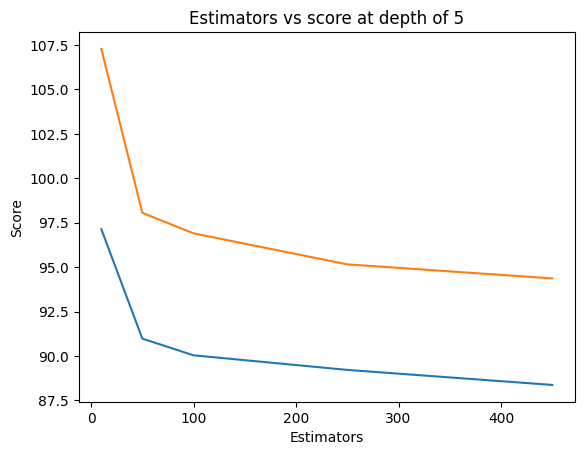

In [40]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestRegressor(bootstrap=True, criterion='squared_error',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = mean_squared_error(y_train,clf.predict(df_final_train))
    test_sc = mean_squared_error(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 103.83627506730869 test Score 112.62681628153926
depth =  9 Train Score 90.11572456595849 test Score 97.26161392803778
depth =  11 Train Score 90.11572456595847 test Score 97.26161392803776
depth =  15 Train Score 90.11572456595847 test Score 97.26161392803778
depth =  20 Train Score 90.11572456595847 test Score 97.26161392803776
depth =  35 Train Score 90.11572456595847 test Score 97.26161392803776
depth =  50 Train Score 90.11572456595847 test Score 97.26161392803776
depth =  70 Train Score 90.11572456595847 test Score 97.26161392803776
depth =  130 Train Score 90.11572456595847 test Score 97.26161392803776


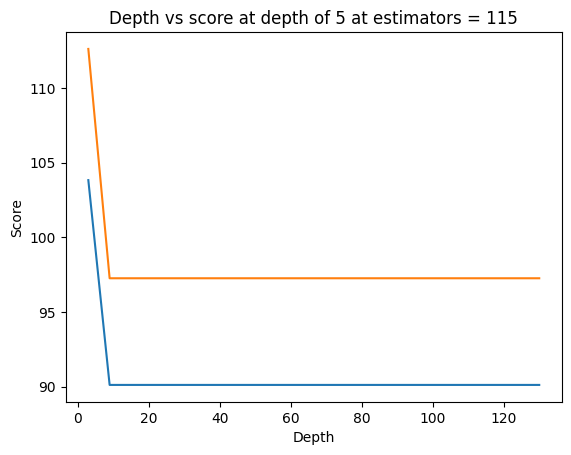

In [41]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestRegressor(bootstrap=True, criterion='squared_error',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = mean_squared_error(y_train,clf.predict(df_final_train))
    test_sc = mean_squared_error(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestRegressor(random_state=25,n_jobs=-1)

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='neg_root_mean_squared_error',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
# print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [ -9.91932851  -9.97431231 -10.97258969 -10.85389199  -9.52150752]


In [43]:
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean train scores [ -9.54361161  -9.55530383 -10.72366292 -10.57177919  -9.04388153]


In [44]:
print(rf_random.best_estimator_)

RandomForestRegressor(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                      n_estimators=121, n_jobs=-1, random_state=25)


In [45]:
RandomForestRegressor(bootstrap=True, criterion='squared_error',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=14, max_features='auto', min_samples_leaf=28,
                      min_samples_split=111, n_estimators=121, n_jobs=-1,
                      random_state=25)

In [46]:
clf = RandomForestRegressor(bootstrap=True, criterion='squared_error',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [47]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [48]:
#https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import mean_squared_error
print('Train mean_squared_error',mean_squared_error(y_train,y_train_pred))
print('Test mean_squared_error',mean_squared_error(y_test,y_test_pred))

Train mean_squared_error 80.01035571043447
Test mean_squared_error 89.75162831974183


In [49]:
print("Train Error metrics")

MSE  = mean_squared_error((y_train), (y_train_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train), (y_train_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((df_final_train.shape[0]-1)/(df_final_train.shape[0]-df_final_train.shape[1]-1)))


print("*******************************************************")
print("Test Error metrics")
MSE  = mean_squared_error((y_test), (y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_test_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train Error metrics
MSE : 80.01035571043447
RMSE : 8.944850793078354
R2 : 0.6984897682760802
Adjusted R2 :  0.6954557030511854
*******************************************************
Test Error metrics
MSE : 89.75162831974183
RMSE : 9.473733599787458
R2 : 0.6578151936604464
Adjusted R2 :  0.6435574933962983


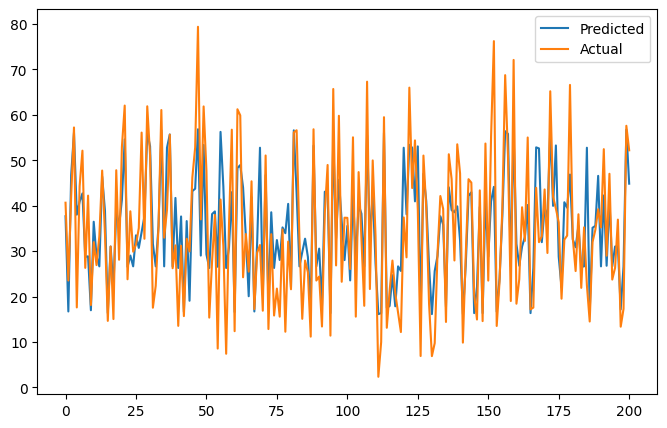

In [50]:
plt.figure(figsize=(8,5))
plt.plot((y_test_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [51]:
# X_train, X_test, y_train, y_test


train_x = X_train.copy()

train_y = y_train.copy()

test_x = X_test.copy()

test_y = y_test.copy()

In [52]:

def mean_absolute_percentage_error(y_true, y_pred):
    """
    return: MAPE

    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## Using XGBoost Regressor


In [53]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
# depth of tree
for i in [2,4]:
    # number of estimators
    for j in [500,800,1000]:

        regr = xgb.XGBRegressor(max_depth= i, min_samples_split= 2,learning_rate=0.01,n_estimators = j, verbose=1)
        regr.fit(train_x, train_y)
        y_pred_test = regr.predict(test_x)
        y_pred_train = regr.predict(train_x)
        print('-'*50)

#         roc_auc = scoreClickAUC(train['clicks'],train['impressions'],y_pred_train)
        err = mean_absolute_error(y_pred_train, train_y)
        print("the train auc with depth = ",i," and with esimators = ",j," is ")
        print("Train_MAPE", err * 100)

#         roc_auc = scoreClickAUC(test['clicks'],test['impressions'],y_pred_test)
        err = mean_absolute_error(y_pred_test, test_y)
        print("the test auc with depth = ",i," and with esimators = ",j," is ")
        print("Test_MAPE",err * 100)

--------------------------------------------------
the train auc with depth =  2  and with esimators =  500  is 
Train_MAPE 500.1734776496887
the test auc with depth =  2  and with esimators =  500  is 
Test_MAPE 566.0689834101283
--------------------------------------------------
the train auc with depth =  2  and with esimators =  800  is 
Train_MAPE 422.45677356340406
the test auc with depth =  2  and with esimators =  800  is 
Test_MAPE 498.47340445257544
--------------------------------------------------
the train auc with depth =  2  and with esimators =  1000  is 
Train_MAPE 393.66276803301344
the test auc with depth =  2  and with esimators =  1000  is 
Test_MAPE 472.3439843286923
--------------------------------------------------
the train auc with depth =  4  and with esimators =  500  is 
Train_MAPE 289.2646229706001
the test auc with depth =  4  and with esimators =  500  is 
Test_MAPE 428.98006312052405
--------------------------------------------------
the train auc with 

In [65]:
import matplotlib.pyplot as plt
import numpy as np
regr = xgb.XGBRegressor(max_depth= 4, min_samples_split= 2,learning_rate=0.01,n_estimators = 1000 , verbose=1)
regr.fit(train_x, train_y)
y_pred_test = regr.predict(test_x)
y_pred_train = regr.predict(train_x)
print('-'*50)


--------------------------------------------------


In [66]:
print("Train Error metrics")

MSE  = mean_squared_error((train_y), (y_pred_train))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((train_y), (y_pred_train))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((train_y), (y_pred_train)))*((train_x.shape[0]-1)/(train_x.shape[0]-train_x.shape[1]-1)))


print("*******************************************************")
print("Test Error metrics")
MSE  = mean_squared_error((test_y), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((test_y), (y_pred_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((test_y), (y_pred_test)))*((test_x.shape[0]-1)/(test_x.shape[0]-test_x.shape[1]-1)))


Train Error metrics
MSE : 9.371098189985839
RMSE : 3.0612249492622783
R2 : 0.9646860464288406
Adjusted R2 :  0.9643306858897598
*******************************************************
Test Error metrics
MSE : 23.855448777061646
RMSE : 4.884204006494984
R2 : 0.9090493145055681
Adjusted R2 :  0.9052597026099668


In [67]:
from matplotlib import pyplot
# feature importance
print(regr.feature_importances_)


[0.23747532 0.0938336  0.04495604 0.09454536 0.15516496 0.01722255
 0.04430867 0.31249344]


In [68]:
dataset.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

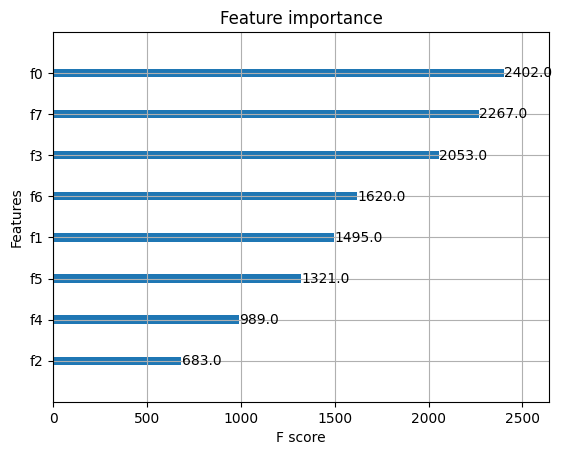

In [69]:
from xgboost import plot_importance
plot_importance(regr)
pyplot.show()


In [ ]:
import pickle
pickle.dump(clf, open('/content/drive/MyDrive/final_prediction.pickle', 'wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/scaler.pickle', 'wb'))